In [18]:
import os

from tensorflow import keras
import tensorflow as tf

from keras.applications import VGG16

In [20]:
base_dir = "/home/kailash/VScode Python projects/tf/conv/small_dataset1"

In [21]:
train_dir = os.path.join(base_dir,"train")

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')



In [22]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))

In [23]:
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [25]:
conv_base.trainable = False

In [26]:

train_datagen = keras.preprocessing.image.ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 15000 images belonging to 2 classes.


In [28]:

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 5000 images belonging to 2 classes.


In [29]:
model.compile(loss='binary_crossentropy',
optimizer=keras.optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

/home/kailash/anaconda3/envs/tensorflow1/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [30]:
history = model.fit(train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 20s 191ms/step - loss: 0.5849 - acc: 0.7010 - val_loss: 0.4546 - val_acc: 0.8010
Epoch 2/30
100/100 [==============================] - 19s 187ms/step - loss: 0.4759 - acc: 0.7850 - val_loss: 0.3609 - val_acc: 0.8540
Epoch 3/30
100/100 [==============================] - 18s 184ms/step - loss: 0.4414 - acc: 0.7975 - val_loss: 0.3513 - val_acc: 0.8460
Epoch 4/30
100/100 [==============================] - 19s 190ms/step - loss: 0.4240 - acc: 0.8080 - val_loss: 0.3174 - val_acc: 0.8680
Epoch 5/30
100/100 [==============================] - 19s 194ms/step - loss: 0.3857 - acc: 0.8355 - val_loss: 0.3172 - val_acc: 0.8670
Epoch 6/30
100/100 [==============================] - 20s 198ms/step - loss: 0.3797 - acc: 0.8295 - val_loss: 0.3126 - val_acc: 0.8680
Epoch 7/30
100/100 [==============================] - 20s 196ms/step - loss: 0.3736 - acc: 0.8325 - val_loss: 0.2945 - val_acc: 0.8660
Epoch 8/30
100/100 [==============================] - 2

In [31]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [32]:
model.compile(loss='binary_crossentropy',
optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),metrics=['acc'])

history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 23s 221ms/step - loss: 0.3268 - acc: 0.8640 - val_loss: 0.2195 - val_acc: 0.9120
Epoch 2/100
100/100 [==============================] - 20s 198ms/step - loss: 0.2932 - acc: 0.8735 - val_loss: 0.2166 - val_acc: 0.9120
Epoch 3/100
100/100 [==============================] - 20s 197ms/step - loss: 0.3054 - acc: 0.8585 - val_loss: 0.2383 - val_acc: 0.8950
Epoch 4/100
100/100 [==============================] - 20s 198ms/step - loss: 0.2633 - acc: 0.8805 - val_loss: 0.2061 - val_acc: 0.9240
Epoch 5/100
100/100 [==============================] - 20s 198ms/step - loss: 0.2804 - acc: 0.8805 - val_loss: 0.1888 - val_acc: 0.9270
Epoch 6/100
100/100 [==============================] - 20s 197ms/step - loss: 0.2458 - acc: 0.8905 - val_loss: 0.1678 - val_acc: 0.9330
Epoch 7/100
100/100 [==============================] - 20s 196ms/step - loss: 0.2376 - acc: 0.8975 - val_loss: 0.1848 - val_acc: 0.9340
Epoch 8/100
100/100 [===========================

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

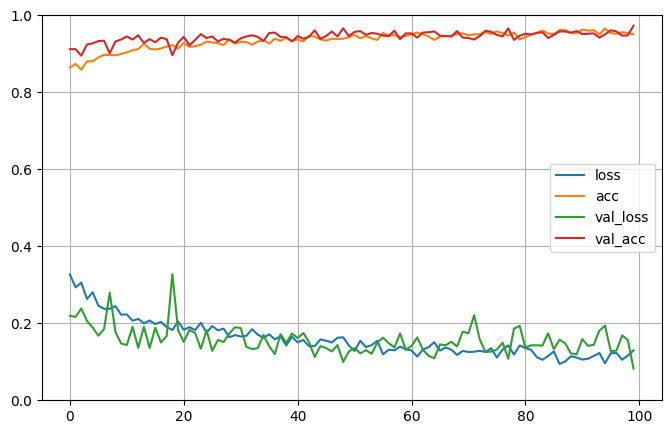

: 

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0.0-1]
plt.show()